# Project 7: Communicate Data Findings 

***- Anubhav Sachdev***

## Introduction

This project focuses on two aspects. The first aspect focuses on systematically exploring a selected dataset and coming up with *Univariate, Bivariate and Multivariate* plots.  
The second aspect focuses on producing a presentation that highlights interesting *Insights, Trends and Relationships.*

The first part can be described as **Exploratory Data Visualization**. The second part can be described as **Explanatory Visualization.**



The dataset used in this project is named as **'AmazingMartEU2'**. This data has been recorded by a store in Europe. From a broader perspective, it contains information about **Orders** such as *Total Sales, Profit, Customer Names, Customer Country & City, Category & Sub-Category of Goods ordered etc.* It provides more or less all the information required to gauge the store's sales performance as well as the type of goods being preferred by different customers belonging to different regions. 

*It has 3 different sheets.* 

The first sheet is named as **'ListOfOrders'.** It contains information such has *Order ID, Customer Name, Country, City, State, Ship Date, Region, Segment (Consumer, Corporate, Home Office), Ship Mode (Economy, Priority) etc.*  
The second sheet is named as **'OrderBreakdown'**. It contains information such as *Product Name, Category & Sub-Category, Disocunt, Quantity, Sales and Profit.*  
The third sheet is named as **'SalesTargets'.** It contains information on *Monthly Sales Targets.*

In this analysis, we will be needing only the first two sheets. We won't be doing any analysis on the third sheet.

*Let us begin with Data Gathering Process!*

### Data Gathering and Assessment

First, let us load in the required Python libraries.

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Now, we will load the data and try to understand and assess it's features.

In [2]:
# Loading the first sheet in our Jupyter Notebook
df_lod = pd.read_excel('AmazingMartEU2.xlsx',sheet_name= 'ListOfOrders')

In [3]:
# Looking at the first 5 rows of the first sheet to get a glimpse of the data
df_lod.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England
4,AZ-2011-617423,2011-01-05,Daniel Burke,Echirolles,France,Central,Home Office,2011-01-07,Priority,Auvergne-Rhône-Alpes


In [4]:
# Assessing the data type of all the variables
df_lod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
Order ID         4117 non-null object
Order Date       4117 non-null datetime64[ns]
Customer Name    4117 non-null object
City             4117 non-null object
Country          4117 non-null object
Region           4117 non-null object
Segment          4117 non-null object
Ship Date        4117 non-null datetime64[ns]
Ship Mode        4117 non-null object
State            4117 non-null object
dtypes: datetime64[ns](2), object(8)
memory usage: 321.7+ KB


In [5]:
# Loading the second sheet in our Jupyter Notebook
df_ob = pd.read_excel('AmazingMartEU2.xlsx',sheet_name= 'OrderBreakdown')

In [6]:
# Looking at the first 5 rows of the second sheet to get a glimpse of the data
df_ob.head()

,Order ID,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [7]:
# Assessing the data type of all the variables
df_ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 8 columns):
Order ID        8047 non-null object
Product Name    8047 non-null object
Discount        8047 non-null float64
Sales           8047 non-null int64
Profit          8047 non-null int64
Quantity        8047 non-null int64
Category        8047 non-null object
Sub-Category    8047 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 503.0+ KB


Now, we will join the two sheets using Order ID as the key. We will use Inner Join to get values which are common in both the datasets. This will get us a dataset with 17 columns which in turn include both qualitative & quantitative variables.

We will now have sufficient information/data to begin with our data visualization process and generate insights.

In [8]:
# Joining the two sheets on OrderID using Inner Join
df = pd.merge(df_lod,df_ob,on = "Order ID",how = "inner")

In [9]:
# Looking at the first 5 rows of the main data to get a glimpse of the data
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.5,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,"Dania Corner Shelving, Traditional",0.0,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140,21,3,Office Supplies,Art
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Boston Markers, Easy-Erase",0.5,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Eldon Folders, Single Width",0.5,17,-1,2,Office Supplies,Storage


In [10]:
# Assessing the data type of all the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 17 columns):
Order ID         8047 non-null object
Order Date       8047 non-null datetime64[ns]
Customer Name    8047 non-null object
City             8047 non-null object
Country          8047 non-null object
Region           8047 non-null object
Segment          8047 non-null object
Ship Date        8047 non-null datetime64[ns]
Ship Mode        8047 non-null object
State            8047 non-null object
Product Name     8047 non-null object
Discount         8047 non-null float64
Sales            8047 non-null int64
Profit           8047 non-null int64
Quantity         8047 non-null int64
Category         8047 non-null object
Sub-Category     8047 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(11)
memory usage: 1.1+ MB


In [11]:
# Assessing summary statistics of quantitative variables in the data
df.describe()

,Discount,Sales,Profit,Quantity
count,8047.000000,8047.000000,8047.000000,8047.000000
mean,0.110047,291.845657,35.198211,3.772089
std,0.181773,485.212156,178.125844,2.203369
min,0.000000,3.000000,-3060.000000,1.000000
25%,0.000000,48.000000,1.000000,2.000000
50%,0.000000,117.000000,14.000000,3.000000
75%,0.100000,313.000000,47.000000,5.000000
max,0.850000,6517.000000,2476.000000,14.000000


The Mean, Minimum, Maximum, Quartile values for all the quantitative variables can be seen above. The maximum Sales amount is 6517.

In [12]:
# Checking for Null Values
df.isnull().sum()

Order ID         0
Order Date       0
Customer Name    0
City             0
Country          0
Region           0
Segment          0
Ship Date        0
Ship Mode        0
State            0
Product Name     0
Discount         0
Sales            0
Profit           0
Quantity         0
Category         0
Sub-Category     0
dtype: int64

There is no missing values in the dataset.

In [13]:
# Checking for Duplicate values
df.duplicated().sum()

2

There are two duplicate values in the dataset.

In [14]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [15]:
# Checking whether Duplicate values have been removed
df.duplicated().sum()

0

*Finally, we are done with our data assessment.*

Now, we can begin with  making visualizations!

### Exploratory Data Visualization

Let us start with *Univariate (Single Variable)* exploration of data. In this part, we will focus on analyzing a single variable by looking at it's distributions and count of entires!

***UNIVARIATE VISUALIZATIONS***


We will now begin with Univariate exploration of data,i.e.,  visualizations of single variables.  

*We start with analyzing count of different 'Categories' of Products.*

Text(0.5, 1.0, 'Category of Products Ordered')

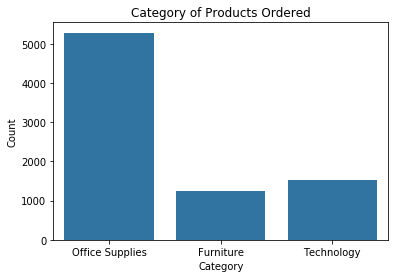

In [16]:
# Visualizing Count of different category of Orders
base_color = sb.color_palette()[0]
sb.countplot(data = df,x = 'Category',color = base_color)
plt.ylabel("Count")
plt.xlabel("Category")
plt.title("Category of Products Ordered")

Text(0.5, 1.0, 'Region Wise Orders')

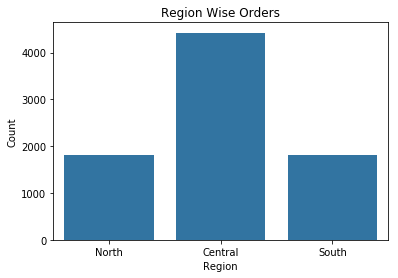

In [17]:
# Visualizing the count of Orders generated by Region
base_color = sb.color_palette()[0]
sb.countplot(data = df,x = 'Region',color = base_color)
plt.ylabel("Count")
plt.title("Region Wise Orders")

It can be seen that **'Office Supplies'** was the most *Ordered Product Catgeory* and **'Central Region'** generated the *most Orders.*

*We will now look at the distributions of a few quantitative variables. Let's begin!*

Text(0.5, 1.0, 'Distribution of Sales')

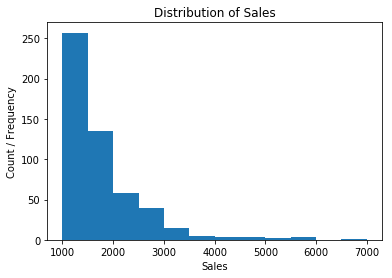

In [18]:
# Plotting a Histogram for Sales
bins = np.arange(1000,df['Sales'].max()+500,500)
plt.hist(df['Sales'],bins = bins)
plt.xlabel("Sales")
plt.ylabel("Count / Frequency")
plt.title("Distribution of Sales")

*The histogram we see above shows a right skewed distribution.* This means that there is a high chance that the mean lies to the right of the median (*basically, mean is greater than median).*

Most of the values are in bins which are on the left of the distribution. The distribution is not balanced! The tail of the distribution is longer on the right!

Text(0.5, 1.0, 'Distribution of Quantity')

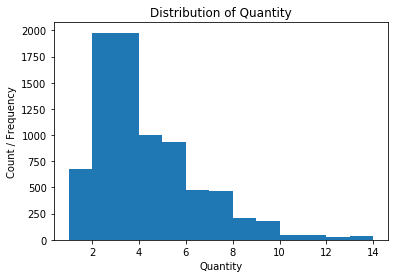

In [19]:
# Plotting a Histogram for Quantity
bins = np.arange(1,df['Quantity'].max()+1,1)
plt.hist(df['Quantity'],bins = bins)
plt.xlabel("Quantity")
plt.ylabel("Count / Frequency")
plt.title("Distribution of Quantity")

*Histogram for Quantity is also right skewed. It can interpreted in a similar way to the 'Sales' histogram.*

Text(0.5, 1.0, 'Distribution of Profit')

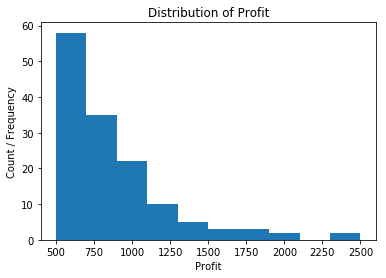

In [20]:
# Plotting a Histogram for Profit
bins = np.arange(500,df['Profit'].max()+200,200)
plt.hist(df['Profit'],bins = bins)
plt.xlabel("Profit")
plt.ylabel("Count / Frequency")
plt.title("Distribution of Profit")

*The histogram for Profit is Right Skewed as well!*

In all the three histograms above, we saw that the data was highly skewed. Such data distributions are amenable to **Scale Transformations.**

The most common example of Scale Transformation is the data that follows an approximately *Log Normal Distribution*. This is basically data, which in its natural units can appear highly skewed with a very long tail of data points.  
However, if we apply a log transformation to this data, the data will start following a normal distribution.

Let's apply *logarithmic scaling* to the variable **'Sales'** and see whether it's distribution follows an approximately normal distribution!

Text(0.5, 1.0, 'Logarithmic Scaling of Sales')

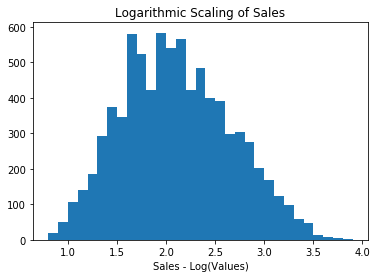

In [21]:
# Applying Log Transformation to Sales
log_data = np.log10(df['Sales'])
log_bin = np.arange(0.8, log_data.max()+0.1,0.1)
plt.hist(log_data, bins = log_bin)
plt.xlabel('Sales - Log(Values)')
plt.title("Logarithmic Scaling of Sales")


*We can see the transformation has worked. The distribution looks approximately **Normal**.*

Text(0.5, 1.0, 'Logarithmic Scaling of Sales')

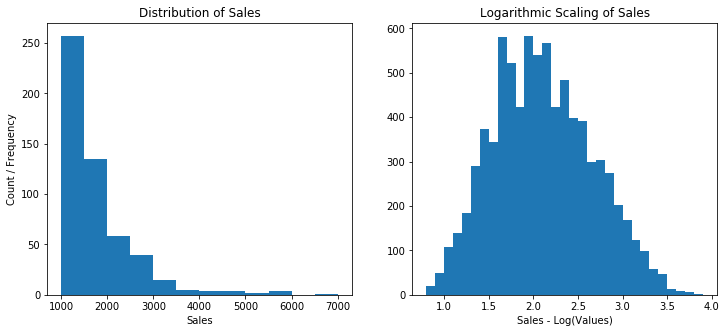

In [22]:
plt.figure(figsize = [12,5])

# Plotting a Histogram for Sales
plt.subplot(1,2,1)
bins = np.arange(1000,df['Sales'].max()+500,500)
plt.hist(df['Sales'],bins = bins)
plt.xlabel("Sales")
plt.ylabel("Count / Frequency")
plt.title("Distribution of Sales")



# Applying Log Transformation to Sales
plt.subplot(1,2,2)
log_data = np.log10(df['Sales'])
log_bin = np.arange(0.8, log_data.max()+0.1,0.1)
plt.hist(log_data, bins = log_bin)
plt.xlabel('Sales - Log(Values)')
plt.title("Logarithmic Scaling of Sales")



*In the Sales Histogram on the left, the few data points with value above **3000** mash the majority of the points into the bins on the far left.*  
*In the Sales Histogram on the right, the logarithmic transformation makes those large points look in line with the rest.*

Similarly, Logarithmic Transformation can be applied to **'Profit'** & **'Quantity'** as well.  
Log Scaling can prove to be very useful in quite a lot of cases like above. *It certainly helps the distribution plot to look more balanced*.






*Let's try something a bit more interesting* : **KDE**

**Kernel density estimation** is one way of estimating the probability density function of a variable. 

It can be useful if you want to visualize just the *“shape”* of some data, as a kind of continuous replacement for the discrete histogram.  
In a KDE plot, you can think of each observation as replaced by a small *‘lump’* of area. 

*Let's generate a KDE for better understanding.* We will focus on **'Sales'**, **'Quantity'** and **'Profit'.**

C:\Users\ANUBHAV SACHDEV\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Count / Frequency')

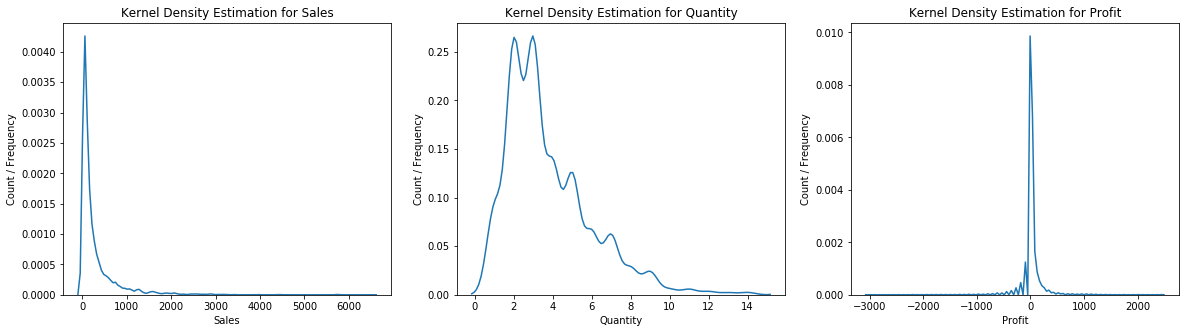

In [23]:
# Plotting a Kernel Density Estimation for 'Sales', 'Quantity' and 'Profit' using Sub-Plots
plt.figure(figsize = [20,5])

plt.subplot(1,3,1)
sb.distplot(df['Sales'],hist = False)
plt.title("Kernel Density Estimation for Sales")
plt.ylabel("Count / Frequency")

plt.subplot(1,3,2)
sb.distplot(df['Quantity'],hist = False)
plt.title("Kernel Density Estimation for Quantity")
plt.ylabel("Count / Frequency")

plt.subplot(1,3,3)
sb.distplot(df['Profit'],hist = False)
plt.title("Kernel Density Estimation for Profit")
plt.ylabel("Count / Frequency")


*Interpreting proportions from KDE plot is a bit trickier.*

*Under a KDE plot, the total area between the **0-line** and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values*

Even though it is a bit complex to comprehend, there are still reasons to use kernel density estimation!  
If there are relatively few data points available, *KDE provides a smooth estimate of the overall distribution of data.*


Let us start with *Bivariate (Two Variable)* exploration of data. In this part, we will focus on analyzing Relationships between two variables. These two variables can include either a combination of a qualitative and a quantitaive variable or two quantitative variables.

***BIVARIATE VISUALIZATIONS***


Let's begin with looking at the relationship between **'Sales'** & **'Profit'** *(two of the most important quantitative variables in our dataset)*

Text(0.5, 1.0, 'Relationship between Sales and Profit')

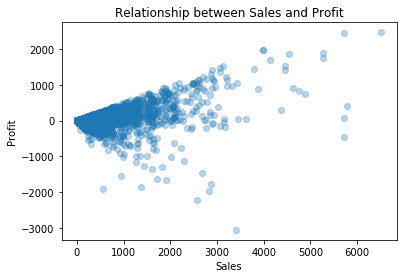

In [24]:
# Plotting relationship between Sales & Profit
plt.scatter(data = df,x = 'Sales',y = 'Profit',marker = 'o',alpha = 0.3)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Relationship between Sales and Profit')

*We can see from the above plot that the relationship between the two variables is not very strong. Although, it is a positive relationship because the dots are moving upwards,i.e., as sales increase, profit also increases.*

We can confirm our initial findings by looking at the **correlation coefficient.**

In [25]:
# Calculationg Correlation Coefficient
df[['Sales','Profit']].corr()

,Sales,Profit
Sales,1.000000,0.441218
Profit,0.441218,1.000000


The correlation between Profit and Sales is **0.44**. *This means that there is a moderately positive relationship between Profit and Sales.*  
This is something we inferred from the scatter plot as well.

Let's move on to another relationship!

Text(0.5, 1.0, 'Relationship between Sales and Quantity')

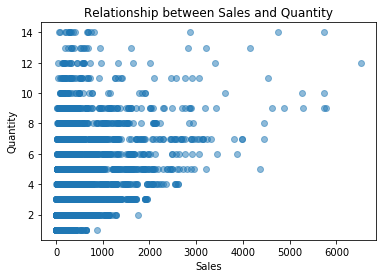

In [26]:
# Plotting the relationship between Sales and Quantity
plt.scatter(data = df,x = 'Sales',y = 'Quantity',alpha = 0.5)
plt.xlabel('Sales')
plt.ylabel('Quantity')
plt.title('Relationship between Sales and Quantity')

It is not easy to interpret the above plot. *There is positive relationship between the two variables. However, it is weak.*

Let's check the Correlation Coefficient!

In [27]:
# Calculationg Correlation Coefficient
df[['Sales','Quantity']].corr()

,Sales,Quantity
Sales,1.000000,0.353415
Quantity,0.353415,1.000000


The correlation between Quantity and Sales is **0.35**. *This means that there is a weak positive relationship between Quantity and Sales.* 

Let's try another one!

Text(0.5, 1.0, 'Relationship between Discount and Quantity')

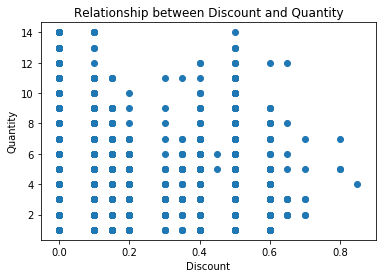

In [28]:
# Plotting the relationship between Discount and Quantity
plt.scatter(data = df,x = 'Discount',y = 'Quantity')
plt.xlabel('Discount')
plt.ylabel('Quantity')
plt.title('Relationship between Discount and Quantity')

*From this plot it can be easily seen that there exists **no** relationship between Discount and Quantity!*


Let's check the Correlation Coefficient!

In [29]:
# Calculationg Correlation Coefficient
df[['Discount','Quantity']].corr()

,Discount,Quantity
Discount,1.000000,0.003633
Quantity,0.003633,1.000000


The correlation between Quantity and Discount is **0.003**. *This means that there is no relationship between Quantity and Discount*.

Last One!

Text(0.5, 1.0, 'Relationship between Discount and Profit')

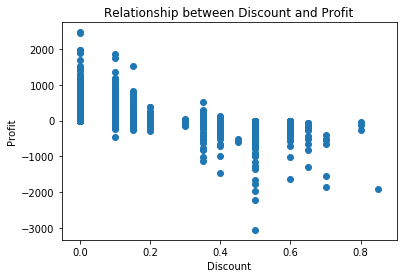

In [30]:
# Plotting the relationship between Discount and Profit
plt.scatter(data = df,x = 'Discount',y = 'Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Relationship between Discount and Profit')

*It is visible that there exists a negative relationship between Profit and Discount. However, it is weak.*

Let's check the Correlation Coefficient!

In [31]:
# Calculationg Correlation Coefficient
df[['Discount','Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.351359
Profit,-0.351359,1.000000


The correlation between Profit and Discount is **-0.35**. *This means that there is a weak negative relationship between Profit and Discount.* 


After analyzing relationships between two quantitative variables, we move on towards something different!



We will now try to establish a relationship between two qualitative variables. In order to do that, we shall consider **Category** & **Region** as our two variables and plot a *Clustered Bar Chart* to visualize the number of orders for each *Category by Region*

Text(0.5, 1.0, 'Region Wise division of Office Supplies')

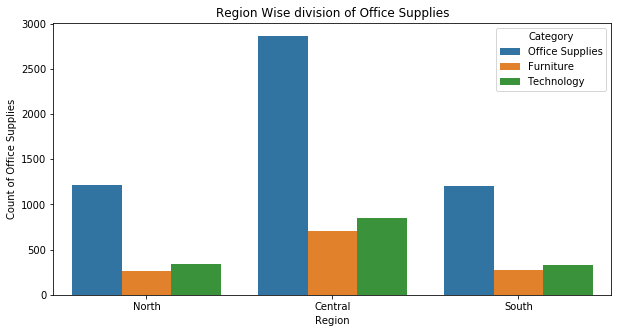

In [32]:
# Plotting clustered bar chart for Category & Region
plt.figure(figsize = [10,5])
ax = sb.countplot(data = df, x = 'Region', hue = 'Category')
plt.ylabel('Count of Office Supplies')
plt.title('Region Wise division of Office Supplies')

*The plot above looks brilliant.* *It can be seen easily which is the most/least ordered Category in every Region.*

**Office Supplies** was the most Ordered Category in all the three regions. However, **Furniture** was the least ordered category in all the three regions.

Now, let us try a *Violin Plot* to understand **Sales** by **Region**

In a Violin Plot,for each level of the categorical variable, a distribution of the values on the numeric variable is plotted. The distribution is plotted as a *Kernel Density Estimate (KDE)*, which is like a smoothed histogram.

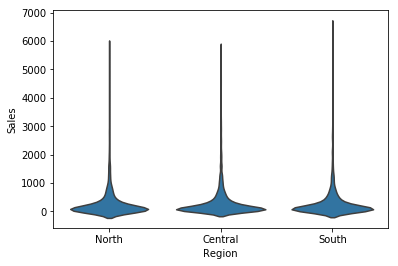

In [33]:
#Plotting Violin Plot for Sales & Region
base_color = sb.color_palette()[0]
sb.violinplot(data = df,x = 'Region', y = 'Sales',color = base_color, inner = None)

In the above plot, we have a curve for each level of the categorical variable, whose area depicts the distribution of points.
Where the curve is wider, we have more data points.  
We can see that most of the data points for all three regions lie in the range **0 - 1000**. This means that most of the sales were in the range of **1-1000.**  
Also, *South Region* had the widest range of data points (Sales).



Let's try another Violin Plot!

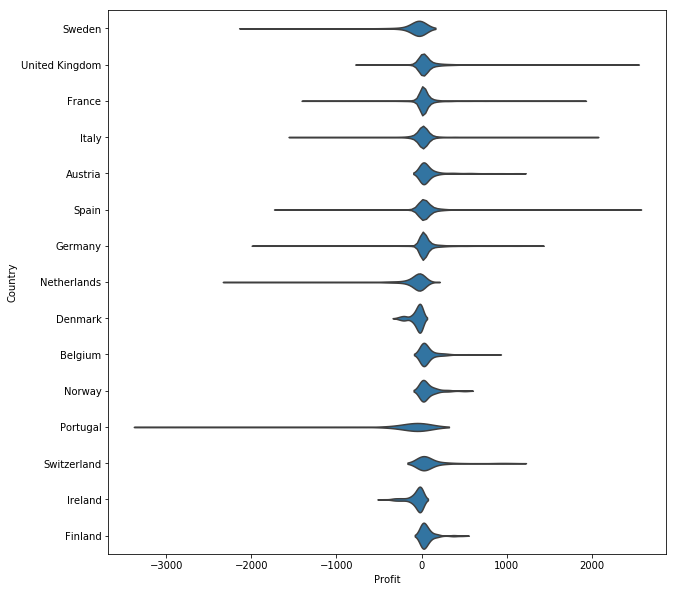

In [34]:
#Plotting Violin Plot for Country and Profit
plt.figure(figsize = [10,10])
base_color = sb.color_palette()[0]
sb.violinplot(data = df,x = 'Profit', y = 'Country',color = base_color, inner = None)


*Violin Plot for Profit and Country can now be easily interpreted.*   
We can see that **Portugal** recorded quite a high number of losses.  
Also, for almost each country, most of the data points are present in the range where profit is around **(-)200 to 200.** 

Now, let us use a Boxplot to see how it can help us!

A box plot is another way of showing the relationship between a numeric variable and a categorical variable. The box plot leans more on s*ummarization* of the data, primarily just reporting a set of *descriptive statistics* for the numeric values on each categorical level.

Text(0.5, 1.0, 'Boxplot for Segment & Quantity')

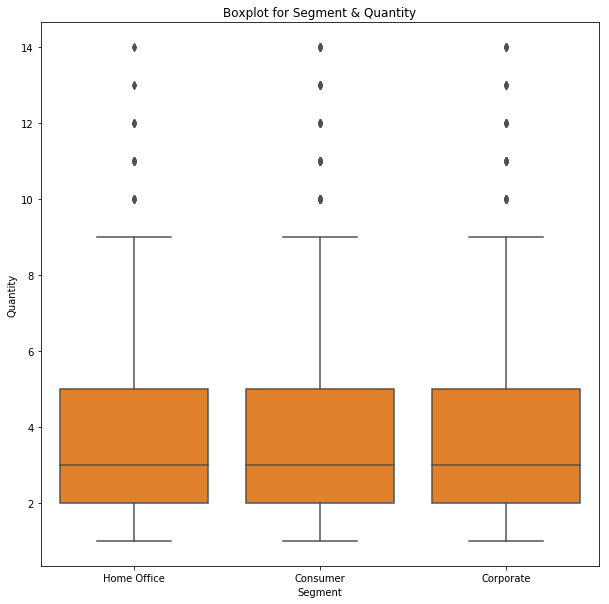

In [35]:
# Making a Boxplot for Segment & Quantity
plt.figure(figsize = [10,10])
base_color = sb.color_palette()[1]
sb.boxplot(data = df,x = 'Segment', y = 'Quantity',color = base_color)
plt.title("Boxplot for Segment & Quantity")

The height of the box is the **Interquartile Range (IQR)**. From the top and bottom of the box, the whiskers indicate the range from the first or third quartiles to the minimum or maximum value in the distribution. 
    
*The upper end of the Box plot indicates the maximum value while the lower end indictaes the minimumm value.* 

The points beyond the end of the whiskers are **Outliers.**

We can see that the **Median Quantity** for almost all three segments is approximately **3**. The *Minimum Quantity* for the 3 segments is also around *1*.   
All three regions have outliers above the upper end!  
 IQR, Q1 & Q3 can be easily calculated or observed.

Let us now focus on a **line plot**!

A line plot is used to plot the trend of a numeric variable against values of a second variable. 
If the second variable represents time, then a line plot is called as **Time Series** plot.

We will plot a Time Series plot for **Profit** and **Order Date.**

Text(0.5, 1.0, 'Profit over Time')

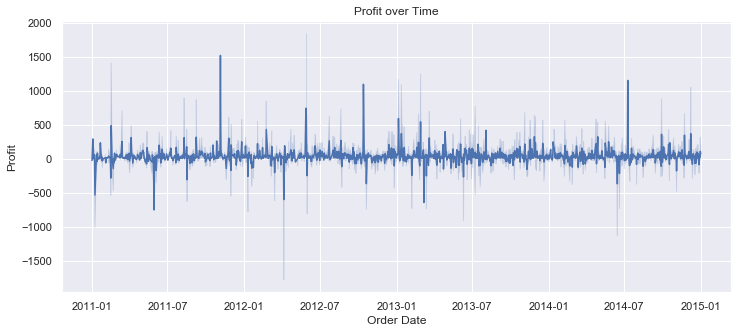

In [36]:
# Plotting a Time Series for Profit.
plt.figure(figsize = [12,5])
sb.set(style = "darkgrid")
sb.lineplot(x = 'Order Date', y = 'Profit',data = df)
plt.title("Profit over Time")

The above plot looks like a **Stationary Time Series.**

In a stationary series the mean, variance and autocorrelation structure do not change over time. Stationarity can be defined in precise mathematical terms, but for our purpose we mean a flat looking series, without trend, constant variance over time, a constant autocorrelation structure over time and no periodic fluctuations.


Lastly, let us explore **Faceting** before we move onto Multivariate Analysis.

*In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable*.

Basically, we will use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. 

Let's try it out!

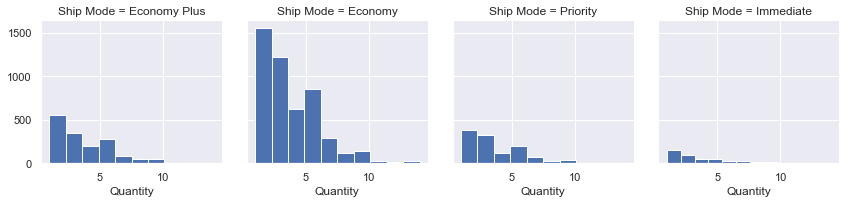

In [37]:
# Faceting for Ship Mode & Quantity
fac = sb.FacetGrid(data = df, col = 'Ship Mode')
fac.map(plt.hist,'Quantity')

We can see the distribution of **Quantity** divided by different **Ship Modes.**

All the distributions are *right skewed!*  
*Quite a good amount of goods were ordered through **Economy** Ship Mode!*

Let us now begin with **Multivariate(Three or More Variables) Exploration of data.**


***MULTIVARIATE VISUALIZATIONS***

In this part of the project, we will focus on analyzing the relationships between three variables.
This will be achieved by utilizing Encodings that can be used to create effective multivariate plots!

The three variables can be a combination of :

*  Two Numeric and Once Categorical Variable
*  One Numeric and Two Categorical Variables
*  Three Numeric Or Three Categorical Varaibles

Let us begin by analyzing the relationship between **Sales**, **Profit** and **Category**.


In [38]:
# Assigning Markers to all three categories
cat_markers =[['Office Supplies','o'],
             ['Technology','s'],
             ['Furniture','v']] 

Text(0.5, 1.0, 'Relationship between Sales, Profit & Category')

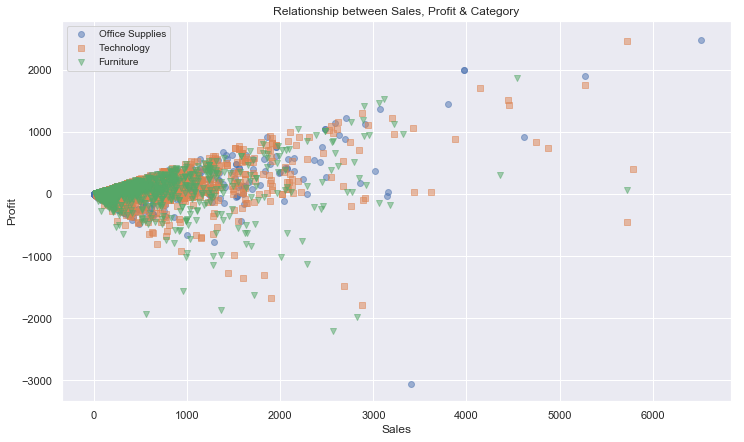

In [39]:
#Plotting a scatter plot for Sales, Profit & Category
plt.figure(figsize = [12,7])

for cat, marker in cat_markers:
    df_cat = df[df['Category'] == cat]
    plt.scatter(data = df_cat, x = 'Sales',y = 'Profit',marker = marker, alpha = 0.5)
plt.legend(['Office Supplies','Technology','Furniture'],fontsize = 10)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Relationship between Sales, Profit & Category")

The scatter plot between **Profit** & **Sales** has been already plotted under Bivariate Visualization Section.  
We already know that the correlation between them is **0.44**, which indicates a moderately positive relationship. 

In this particular plot, we can oberve the **Category** of orders as well. For example, when sales amount was around *3400* and Profit amount was around *-3000*, the goods ordered belonged to the Category **'Office Supplies'**.

*Due too huge number of dots, interpretation for all the orders is not at all easy!*


Let's try another Scatter Plot. This time we will focus on establishing relationship between *three numerical variables*.
Two numerical variables will be plotted on *X & Y axis* respectively. The third variable will be included by using encodings.
We will be making use of **Size Encodings.**

Let us plot **'Discount'**, **'Quantity'** and **'Profit'**.

C:\Users\ANUBHAV SACHDEV\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0.5, 1.0, 'Relationship between Discount, Quantity & Profit')

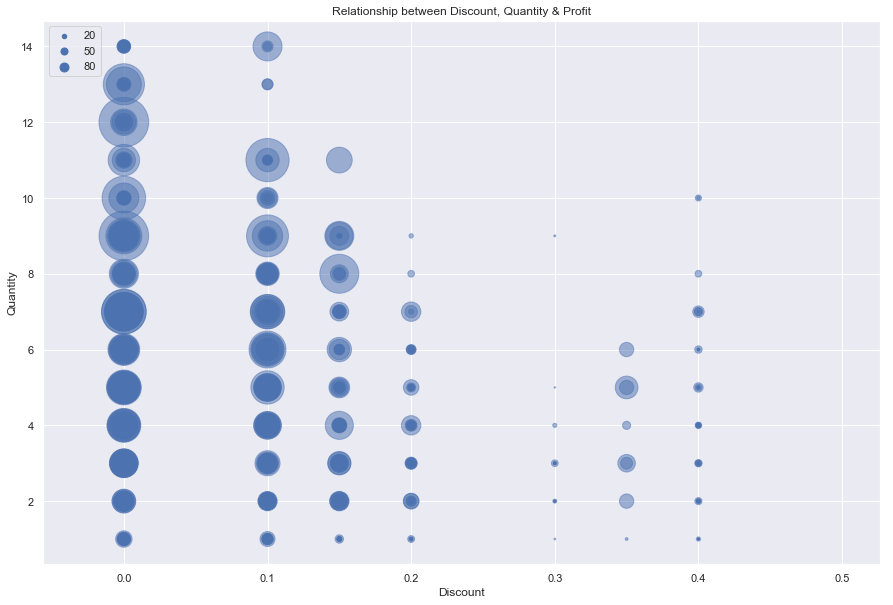

In [40]:
#Plotting a scatter plot for Discount, Quantity and Profit using Size Encodings.
plt.figure(figsize = [15,10])

plt.scatter(data = df, x = 'Discount', y = 'Quantity', s = 'Profit', alpha = 0.5)

sizes = [20,50,80]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s,color = base_color))
plt.legend(legend_obj,sizes)
plt.xlabel("Discount")
plt.ylabel("Quantity")
plt.title("Relationship between Discount, Quantity & Profit")

We can see how *Size Encoding* works from the above plot.

From the plot, it is clear that there is *not any correlation between Discount & Quantity.* It is  difficult to explain their relationship.  
However, the inclusion of Profit helps us in gaining a few insights from the plot.  
For example, when Discount is **0.0** and Quantity is **12**, there is a datapoint where the *Profit is quite* **high**.

Whereas, when Discount is **0.3** and Quantity is **2**, there exists a point where Profit is quite *low*.  

Similarly, many of the points can be interpreted in the above plot.

Now, let us see another example of color encoding.  
Here, we would plot the relationship between **Profit**, **Sales** and **Quantity**. *Profit & Sales would be plotted on X & Y axis respectively. To visualize Quantity, we would use Color Encoding.* The color encoding would be represented by a *Color Palette.*

Let's try!

Text(0.5, 1.0, 'Relationship between Profit, Sales & Quantity')

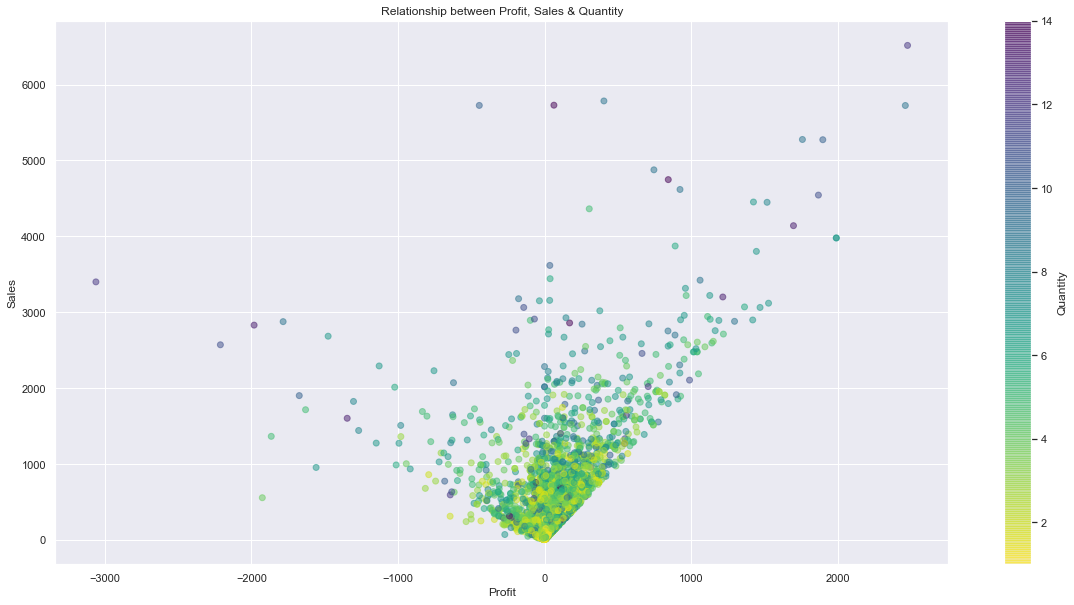

In [41]:
# Plotting relationship between Profit, Sales and Quantity
plt.figure(figsize = [20,10])
plt.scatter(data = df, x = 'Profit', y = 'Sales', c = 'Quantity',cmap = 'viridis_r',alpha = 0.5)
plt.colorbar(label = 'Quantity')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.title('Relationship between Profit, Sales & Quantity')

We can once again see the scatter plot between Profit & Sales. We know already that they both have a moderately positive correlation.

This time, we can also see their relationship with *Quantity*. *Darker the dot, higher the quantity and vice versa.*

For example, when profit is **2000** and Sales is **4000**, the quantity ordered is around **6-8**, based on the color of the dot.

Quite a lot of datapoints can be interpreted in a similar way!

Now, we will explore **Faceting** once again!

As we know,*in faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable*.

Earlier we have seen division of data into four subsets by a catgeorical variabe.

Now, we will use this technique to facet bivariate plots in order to create multivariate visualization.  
Let's try it using **Region**, **Segment** and **Sales**.


C:\Users\ANUBHAV SACHDEV\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ANUBHAV SACHDEV\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


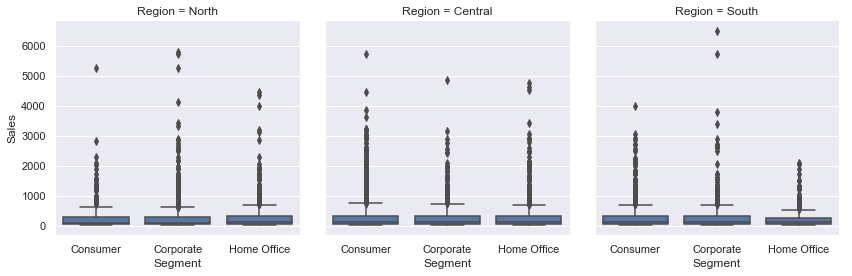

In [76]:
# Faceting for Region, Segment & Category
g = sb.FacetGrid(data = df,col = 'Region',size = 4)
g.map(sb.boxplot,'Segment', 'Sales')

In the above plot, we can see that *Box Plots* for **Sales** have been visualized. There are three Box plots in every subplot. The three Box plots represent different **Segment**. While the three Sub plots represent **Region**.

*So, we can now easily see the descriptive summary of 'Sales' for 'Consumer Segment' in the 'Region North'.*

Faceting has helped us in analyzing three variables above!



Now, we will use Faceting to analyze relationships between *Four Variables!*

Let us try to visualize the relationship between **Sales** & **Quantity** using a scatter plot and then divide the plot into several *Subplots* on the basis of **Category** & **Segment.**

C:\Users\ANUBHAV SACHDEV\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


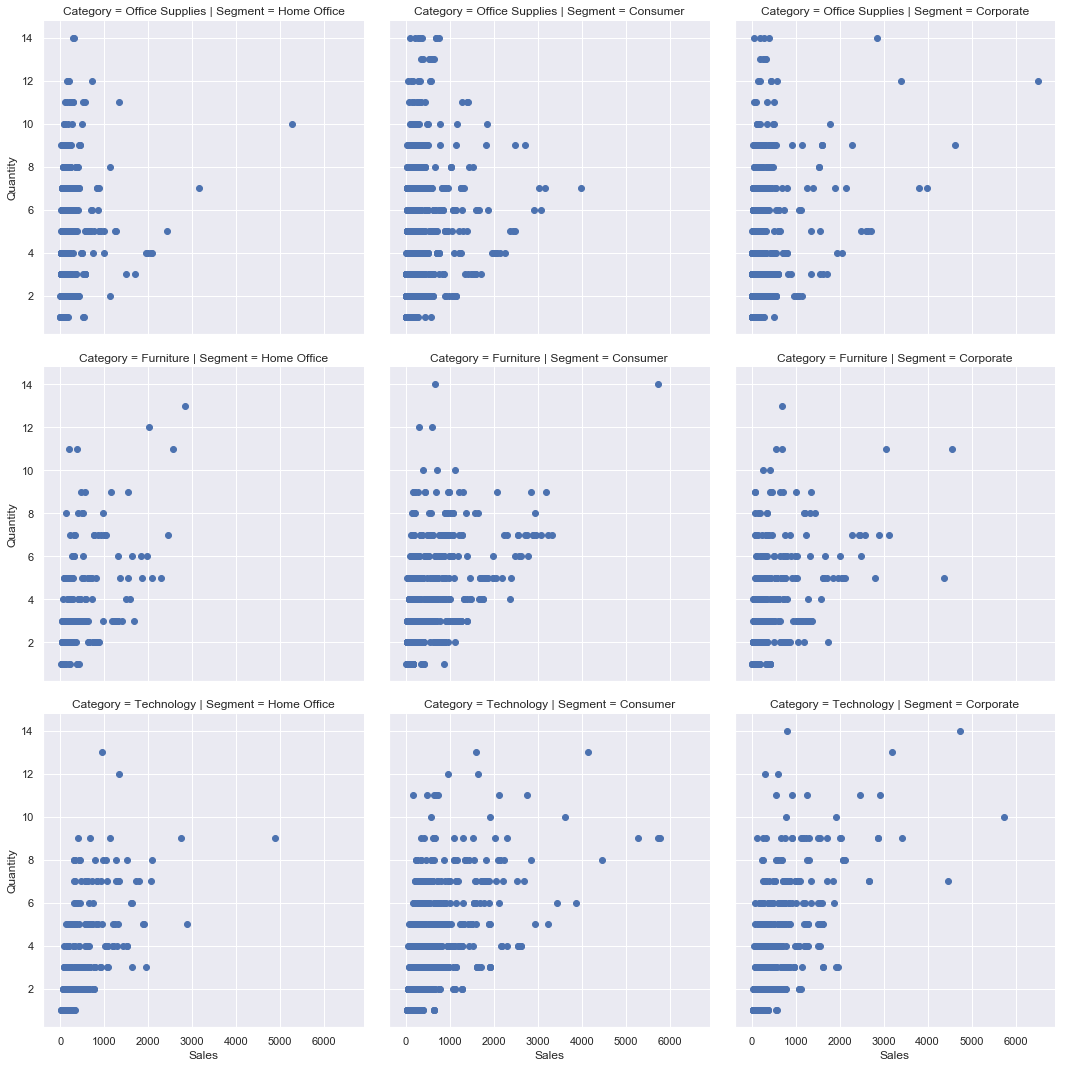

In [78]:
# Plotting relationship between Sales, Quantity, Category & Segment
g = sb.FacetGrid(data = df,col = 'Segment',row = 'Category',size = 5)
g.map(plt.scatter,'Sales', 'Quantity')

We have in total **Nine** plots. The Relationship between **Sales** & **Quantity** can be seen in all the 9 plots. The data has been divided on the basis of **Category** & **Segment.**

*For example*, the plot on the left-hand side of the last row, shows us the relationship between *Sales* & *Quantity* when *Category* is **Technology** and *Segment* is **Home Office.**

Let's move onto the final plot of this section : **Pointplot**



A *Pointplot* represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Pointplots helps in understanding relationships between a numeric variable and different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. 

Let's plot a Pointplot between **Profit**, **Segment** and **Ship Mode** to see how it works!

Text(0.5, 1.0, 'Pointplot for Segment, Ship Mode & Profit')

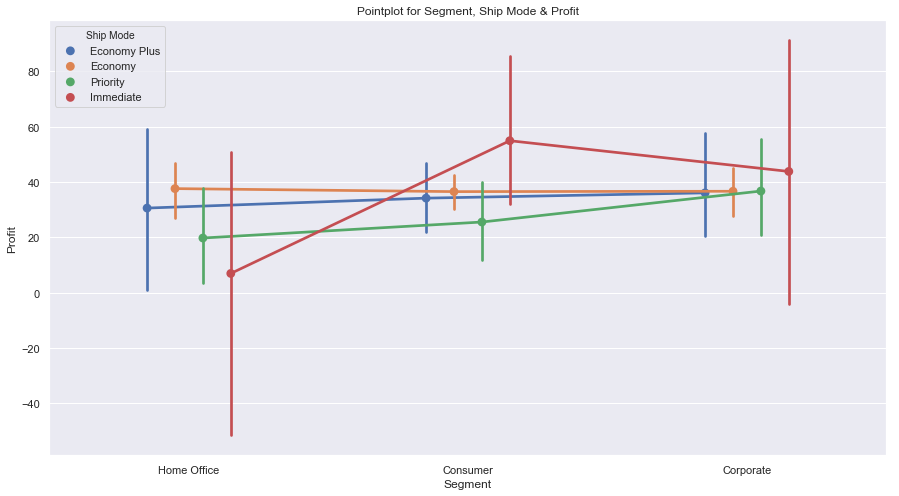

In [73]:
#Plotting Pointplot between Segment, Profit, Ship Mode
plt.figure(figsize = [15,8])
ax = sb.pointplot(data = df, x = 'Segment', y = 'Profit', hue = 'Ship Mode', dodge = 0.3, linestyle = "")
plt.title("Pointplot for Segment, Ship Mode & Profit")

*The Pointplot is very intuitive.* The points represent an estimate of central tendency of **Profit.** 

For example, When *Segment* is **Home Office** and *Ship Mode* is **Priority**, the mean *Profit* is approximately **20.**


With this we conclude our *Multivariate Exploration* section. *We are now done with all our visualizations.* 

# Conclusion

**Let's summarize some of the inights we generated from the above analysis.**

* *Office Supplies was the most ordered Product Category.*
* *Central Region generated the most orders.*
* *The distributions for Sales, Profit & Quantity were right skewed.*
* *No pair of two numeric variables had a strong correlation.*
* *South Region has the biggest Sales range.*
* *Quiet a large number of Orders from Portugal generated losses.*
* *The Median Quantity ordered for all 3 regions was around 3.*
* *The time series of Profit over time showed a stationary process.*
* *When data was analyzed on the basis of Segment & Ship Mode, Mean Profit was maximum under Consumer Segment & Immediate Shipping Mode.*

# Limitations

* *All possible relationships between variables were not analyzed.*
* *The third sheet in the dataset was not analyzed or included in the project.*
* *All plots/points were not deeply analyzed.*
